In [85]:
# Zaimportowanie niezbędnych bibliotek

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import *
from category_encoders import *
import matplotlib.pyplot as plt
from scipy.stats import zscore
import plotly.graph_objects as go
import plotly.figure_factory as ff
import sklearn

In [2]:
# Utworzenie ramki danych

df = pd.read_csv("data_cleaned.csv")

In [3]:
df

,Cena,Miasto,Dzielnica,Pokoje,Pow. całkowita,Rok budowy,Piętro,Liczba pięter,Balkon,Cena/m2,Sprzedaż,Najem,Rynek pierwotny
0,518569.0,Gdynia,Cisowa,2,40.72,2025,1,4,0,12735.00,1,0,1
1,518569.0,Gdynia,Cisowa,2,40.72,2025,1,4,0,12735.00,1,0,1
2,518569.0,Gdynia,Cisowa,2,40.72,2025,1,4,0,12735.00,1,0,1
3,518569.0,Gdynia,Cisowa,2,40.72,2025,1,4,0,12735.00,1,0,1
4,518569.0,Gdynia,Cisowa,2,40.72,2025,1,4,0,12735.00,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4874,1500000.0,Sopot,Górny Sopot,4,73.27,1915,2,2,0,20472.23,1,0,0
4875,2337500.0,Sopot,Górny Sopot,5,106.25,2023,3,3,0,22000.00,1,0,1
4876,1649000.0,Sopot,Górny Sopot,5,93.10,1950,2,3,1,17712.14,1,0,0
4877,1500000.0,Sopot,Dolny Sopot,3,80.00,1900,3,3,1,18750.00,1,0,0


In [4]:
# Podstawowe informacje o ramce danych

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4879 entries, 0 to 4878
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Cena             4879 non-null   float64
 1   Miasto           4879 non-null   object 
 2   Dzielnica        4879 non-null   object 
 3   Pokoje           4879 non-null   int64  
 4   Pow. całkowita   4879 non-null   float64
 5   Rok budowy       4879 non-null   int64  
 6   Piętro           4879 non-null   int64  
 7   Liczba pięter    4879 non-null   int64  
 8   Balkon           4879 non-null   int64  
 9   Cena/m2          4879 non-null   float64
 10  Sprzedaż         4879 non-null   int64  
 11  Najem            4879 non-null   int64  
 12  Rynek pierwotny  4879 non-null   int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 495.6+ KB


In [5]:
# Podzielenie ramki danych na dwa podzbiory: sell (sprzedaż) i rent (najem)

sell = df[df["Sprzedaż"] == 1]
sell

,Cena,Miasto,Dzielnica,Pokoje,Pow. całkowita,Rok budowy,Piętro,Liczba pięter,Balkon,Cena/m2,Sprzedaż,Najem,Rynek pierwotny
0,518569.0,Gdynia,Cisowa,2,40.72,2025,1,4,0,12735.00,1,0,1
1,518569.0,Gdynia,Cisowa,2,40.72,2025,1,4,0,12735.00,1,0,1
2,518569.0,Gdynia,Cisowa,2,40.72,2025,1,4,0,12735.00,1,0,1
3,518569.0,Gdynia,Cisowa,2,40.72,2025,1,4,0,12735.00,1,0,1
4,518569.0,Gdynia,Cisowa,2,40.72,2025,1,4,0,12735.00,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4874,1500000.0,Sopot,Górny Sopot,4,73.27,1915,2,2,0,20472.23,1,0,0
4875,2337500.0,Sopot,Górny Sopot,5,106.25,2023,3,3,0,22000.00,1,0,1
4876,1649000.0,Sopot,Górny Sopot,5,93.10,1950,2,3,1,17712.14,1,0,0
4877,1500000.0,Sopot,Dolny Sopot,3,80.00,1900,3,3,1,18750.00,1,0,0


In [6]:
rent = df[df["Najem"] == 1]
rent

,Cena,Miasto,Dzielnica,Pokoje,Pow. całkowita,Rok budowy,Piętro,Liczba pięter,Balkon,Cena/m2,Sprzedaż,Najem,Rynek pierwotny
1102,2500.0,Gdynia,Działki Leśne,2,44.00,1960,1,5,1,56.82,0,1,0
1103,21600.0,Gdynia,Śródmieście,3,84.00,2020,1,4,1,257.14,0,1,0
1104,2100.0,Gdynia,Witomino Radjostacja,2,49.00,1998,4,4,0,42.86,0,1,0
1105,7000.0,Gdynia,Orłowo,2,76.08,2011,5,5,1,92.01,0,1,0
1106,6500.0,Gdynia,Śródmieście,2,50.00,2020,1,17,1,130.00,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4545,250.0,Sopot,Dolny Sopot,3,66.26,1975,4,4,1,3.77,0,1,0
4546,2900.0,Sopot,Wyścigi,2,38.00,2019,2,2,1,76.32,0,1,0
4547,12000.0,Sopot,Dolny Sopot,5,132.00,2014,3,3,0,90.91,0,1,0
4548,6000.0,Sopot,Dolny Sopot,3,90.00,1970,1,3,1,66.67,0,1,0


# Rynek sprzedaży

In [7]:
sell = sell.drop(columns=['Sprzedaż', 'Najem'])

In [8]:
sell.describe()

,Cena,Pokoje,Pow. całkowita,Rok budowy,Piętro,Liczba pięter,Balkon,Cena/m2,Rynek pierwotny
count,4.421000e+03,4421.000000,4421.000000,4421.000000,4421.000000,4421.000000,4421.000000,4421.000000,4421.000000
mean,1.001554e+06,2.731283,62.832644,2001.207645,2.485184,4.916082,0.557340,15744.484029,0.334314
std,7.059172e+05,1.010663,27.381760,34.251437,2.397316,3.490902,0.496757,6215.302572,0.471803
min,1.690000e+05,1.000000,15.610000,1700.000000,1.000000,1.000000,0.000000,4002.060000,0.000000
25%,5.938400e+05,2.000000,44.080000,1985.000000,1.000000,3.000000,0.000000,11231.370000,0.000000
50%,7.772810e+05,3.000000,57.100000,2020.000000,2.000000,4.000000,1.000000,14111.110000,0.000000
75%,1.152725e+06,3.000000,74.000000,2024.000000,3.000000,5.000000,1.000000,18732.140000,1.000000
max,9.725700e+06,13.000000,288.800000,2026.000000,27.000000,37.000000,1.000000,57894.740000,1.000000


In [9]:
sell.groupby("Miasto").mean()

C:\Users\almak\AppData\Local\Temp\ipykernel_23380\101057899.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sell.groupby("Miasto").mean()


,Cena,Pokoje,Pow. całkowita,Rok budowy,Piętro,Liczba pięter,Balkon,Cena/m2,Rynek pierwotny
Miasto,,,,,,,,,
Gdańsk,9.106904e+05,2.654296,59.244122,2005.977265,2.492477,4.825476,0.552658,15443.057643,0.358074
Gdynia,9.952117e+05,2.861162,67.581715,2000.757713,2.434664,5.538113,0.587114,14553.706570,0.331216
Sopot,1.851433e+06,2.996951,79.600305,1959.225610,2.588415,3.652439,0.500000,22493.883659,0.128049


In [58]:
# Liczba ofert na rynku wtórnym i pierwotnym
sell.groupby(["Rynek pierwotny"])["Rynek pierwotny"].count()

Rynek pierwotny
0    2943
1    1478
Name: Rynek pierwotny, dtype: int64

In [60]:
2943/(2943+1478)

0.6656864962678127

Na rynku sprzedaży przeważają oferty z rynku wtórnego (67%).

## <span style="color:red">Można policzyć w bardziej fancy sposób</span>

In [26]:
# Liczba ofert sprzedaży w danym mieście
sell.groupby(["Miasto"])['Miasto'].count().sort_values(ascending=False)

Miasto
Gdańsk    2991
Gdynia    1102
Sopot      328
Name: Miasto, dtype: int64

In [12]:
# Liczba ofert sprzedaży w danej dzielnicy

In [27]:
sell.groupby(["Dzielnica"])['Dzielnica'].count().sort_values(ascending=False)

Dzielnica
Śródmieście            666
Ujeścisko-Łostowice    368
Jasień                 291
Wrzeszcz               224
Dolny Sopot            169
                      ... 
Rudniki                  2
Morena,                  1
Dolny sopot              1
Szadółki                 1
Młyniska                 1
Name: Dzielnica, Length: 63, dtype: int64

In [38]:
# Sprawdzenie istotnych korelacji dla rynku sprzedaży

sell.corr()

C:\Users\almak\AppData\Local\Temp\ipykernel_23380\3440587283.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sell.corr()


,Cena,Pokoje,Pow. całkowita,Rok budowy,Piętro,Liczba pięter,Balkon,Cena/m2,Rynek pierwotny
Cena,1.000000,0.455976,0.700108,-0.087169,0.043988,-0.010365,0.057464,0.695706,-0.123630
Pokoje,0.455976,1.000000,0.772235,-0.087391,0.011990,-0.023835,0.115868,-0.063400,-0.081531
Pow. całkowita,0.700108,0.772235,1.000000,-0.149738,0.008646,-0.036072,0.075196,0.072208,-0.106578
Rok budowy,-0.087169,-0.087391,-0.149738,1.000000,-0.032197,0.082735,0.129903,0.027178,0.467556
Piętro,0.043988,0.011990,0.008646,-0.032197,1.000000,0.583887,0.028783,0.063518,-0.051428
Liczba pięter,-0.010365,-0.023835,-0.036072,0.082735,0.583887,1.000000,-0.012424,0.038173,0.061544
Balkon,0.057464,0.115868,0.075196,0.129903,0.028783,-0.012424,1.000000,0.037197,-0.153243
Cena/m2,0.695706,-0.063400,0.072208,0.027178,0.063518,0.038173,0.037197,1.000000,-0.113155
Rynek pierwotny,-0.123630,-0.081531,-0.106578,0.467556,-0.051428,0.061544,-0.153243,-0.113155,1.000000


### Istotne korelacje: 

* Między ceną a powierzchnią całkowitą (0.7), liczbą pokoi (0.45)
* Między pokojami a powierzchnią całkowitą (0.77)
* Rokiem budowy a rynkiem pierwotnym/wtórnym (0.47)

Co ciekawe, brak istotnej zależności między posiadaniem balkonu a ceną/ceną za metr kwadratowy. Co więcej, nie ma korelacji między ceną/ceną za metr kwadratowy a rokiem budowy.

In [52]:
sell.groupby("Dzielnica").mean().sort_values("Cena/m2", ascending=False)

C:\Users\almak\AppData\Local\Temp\ipykernel_23380\3657482951.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sell.groupby("Dzielnica").mean().sort_values("Cena/m2", ascending=False)


,Cena,Pokoje,Pow. całkowita,Rok budowy,Piętro,Liczba pięter,Balkon,Cena/m2,Rynek pierwotny
Dzielnica,,,,,,,,,
Jelitkowo,2.449950e+06,2.900000,68.281500,2010.400000,2.175000,4.375000,0.875000,35795.841250,0.000000
Orłowo,2.314493e+06,3.243243,86.641351,2011.891892,1.216216,2.351351,0.810811,25993.170811,0.162162
Dolny Sopot,2.316034e+06,3.236686,91.090118,1940.431953,2.426036,3.041420,0.431953,25039.564556,0.035503
Świemirowo,1.455493e+06,2.642857,67.945714,2012.285714,2.428571,3.000000,0.642857,21453.145714,0.857143
Wyścigi,1.538167e+06,2.833333,74.798333,1993.500000,1.666667,5.500000,0.666667,21266.071667,0.000000
...,...,...,...,...,...,...,...,...,...
Pustki Cisowskie - Demptowo,6.647817e+05,3.166667,67.140000,2000.333333,1.666667,2.833333,0.833333,10058.788333,0.250000
Obłuże,6.579600e+05,3.560000,72.104000,1987.280000,2.200000,4.520000,0.880000,9861.053200,0.040000
Kowale,4.492775e+05,2.356322,47.259885,2024.954023,2.448276,5.000000,0.000000,9552.589425,1.000000


## <span style="color:red">Dodać kolumnę z liczbą ofert per dzielnica</span>

Najwyższą cenę za metr kwadratowy można zaobserwować w nadmorskich dzielnicach: w Jelitkowie, w Orłowie, w Dolnym Sopocie, Świemirowie (Sopot) oraz Sopocie Wyścigach.

# Wykresy - boxploty tylko per 

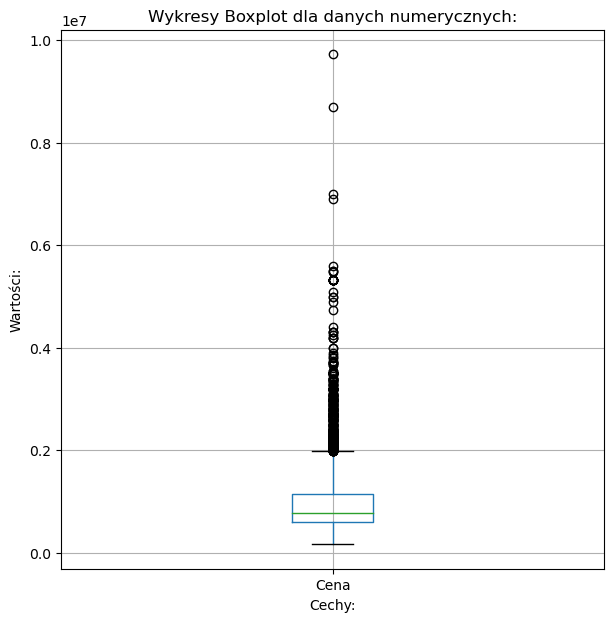

In [107]:
numeric = ["Cena"]
sell[numeric].boxplot(figsize=(7,7))
plt.title("Wykresy boxplot dla ceny mieszkań:")
plt.xlabel("Cechy:")
plt.ylabel("Wartości:")
plt.show()

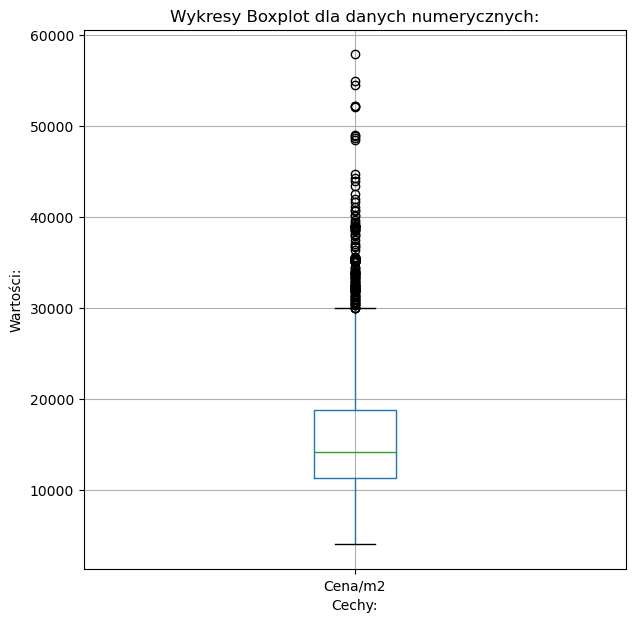

In [104]:
numeric = ["Cena/m2"]
sell[numeric].boxplot(figsize=(7,7))
plt.title("Wykresy Boxplot dla danych numerycznych:")
plt.xlabel("Cechy:")
plt.ylabel("Wartości:")
plt.show()

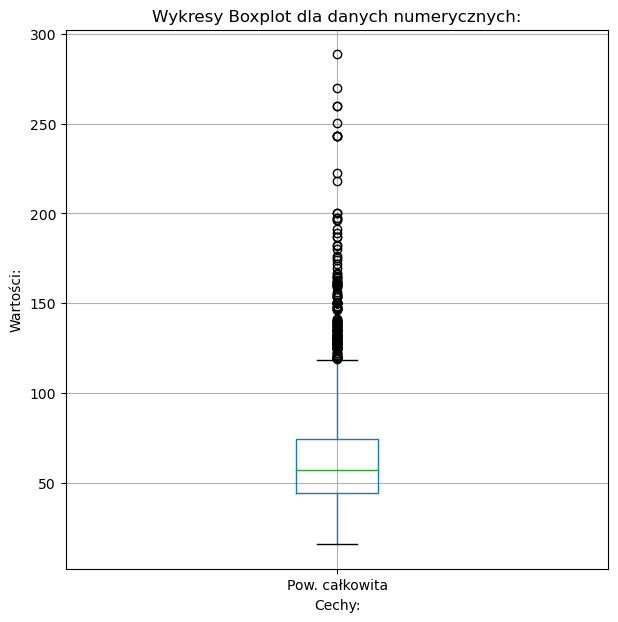

In [106]:
numeric = ["Pow. całkowita"]
sell[numeric].boxplot(figsize=(7,7))
plt.title("Wykresy Boxplot dla danych numerycznych:")
plt.xlabel("Cechy:")
plt.ylabel("Wartości:")
plt.show()

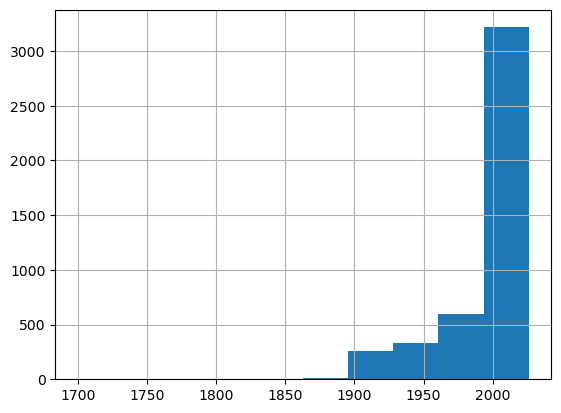

In [98]:
sell['Rok budowy'].hist()
plt.show()

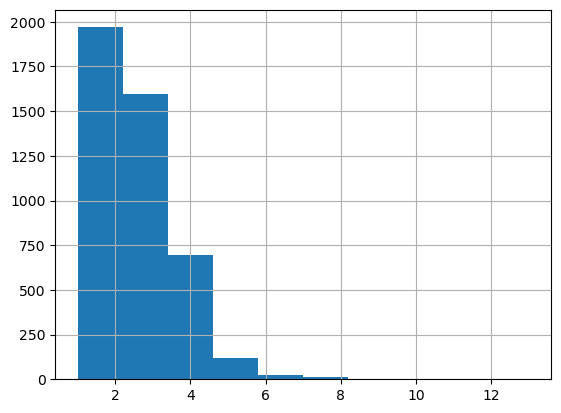

In [99]:
sell['Pokoje'].hist()
plt.show()

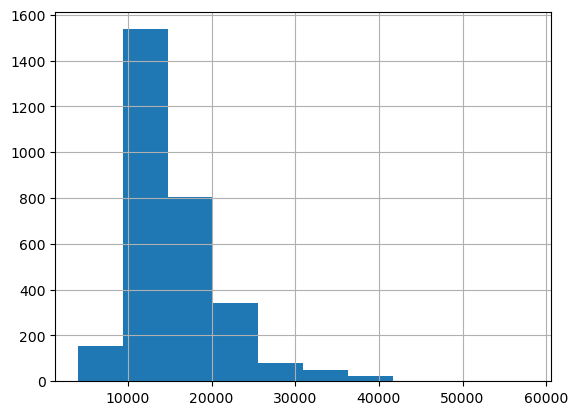

In [79]:
sell[sell['Miasto'] == 'Gdańsk']['Cena/m2'].hist()
plt.show()

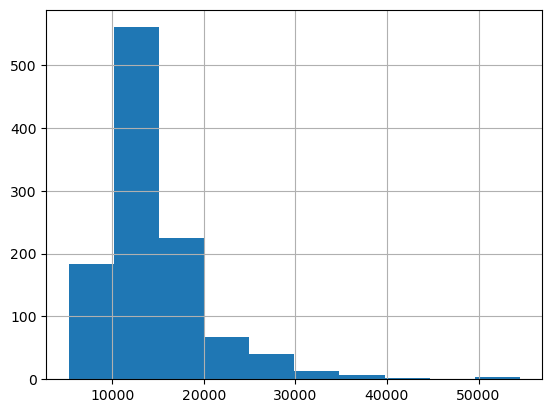

In [80]:
sell[sell['Miasto'] == 'Gdynia']['Cena/m2'].hist()
plt.show()

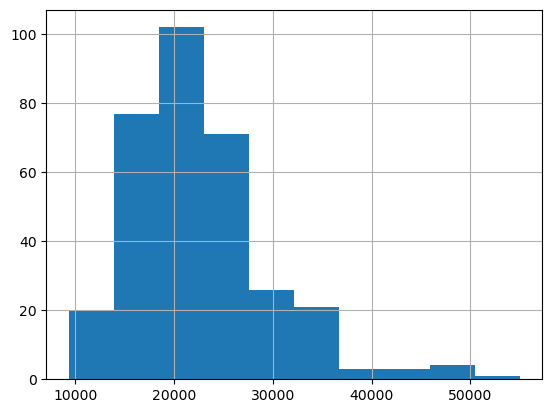

In [81]:
sell[sell['Miasto'] == 'Sopot']['Cena/m2'].hist()
plt.show()

* cena za metr kwadratowy w każdym z miast, w każdej z dzielnic
* wpływ poszczególnych zmiennych, np. balkon (sprawdzenie jakimś wyrafinowanym testem czy różnica jest istotna statystycznie?)
* średnia powierzchnia całkowita w danym roku/dekadzie

# Rynek najmu

In [13]:
rent = rent.drop(columns=['Sprzedaż', 'Najem'])

In [64]:
rent.groupby("Miasto").mean()

C:\Users\almak\AppData\Local\Temp\ipykernel_23380\274963737.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  rent.groupby("Miasto").mean()


,Cena,Pokoje,Pow. całkowita,Rok budowy,Piętro,Liczba pięter,Balkon,Cena/m2,Rynek pierwotny
Miasto,,,,,,,,,
Gdańsk,3388.219745,2.149682,49.458471,2007.213376,2.933121,5.140127,0.671975,69.311369,0.006369
Gdynia,3482.872881,2.338983,55.940763,1998.135593,2.347458,4.762712,0.644068,62.072119,0.008475
Sopot,4494.230769,2.730769,64.060000,1984.076923,3.038462,4.000000,0.769231,70.349231,0.000000


In [74]:
rentagg = rent.groupby("Miasto").mean(), rent.groupby(["Miasto"])["Miasto"].count()
rentagg

C:\Users\almak\AppData\Local\Temp\ipykernel_23380\2668061636.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  rentagg = rent.groupby("Miasto").mean(), rent.groupby(["Miasto"])["Miasto"].count()


(               Cena    Pokoje  Pow. całkowita   Rok budowy    Piętro  \
 Miasto                                                                 
 Gdańsk  3388.219745  2.149682       49.458471  2007.213376  2.933121   
 Gdynia  3482.872881  2.338983       55.940763  1998.135593  2.347458   
 Sopot   4494.230769  2.730769       64.060000  1984.076923  3.038462   
 
         Liczba pięter    Balkon    Cena/m2  Rynek pierwotny  
 Miasto                                                       
 Gdańsk       5.140127  0.671975  69.311369         0.006369  
 Gdynia       4.762712  0.644068  62.072119         0.008475  
 Sopot        4.000000  0.769231  70.349231         0.000000  ,
 Miasto
 Gdańsk    314
 Gdynia    118
 Sopot      26
 Name: Miasto, dtype: int64)

In [41]:
rent.groupby(["Rynek pierwotny"])["Rynek pierwotny"].count()

Rynek pierwotny
0    455
1      3
Name: Rynek pierwotny, dtype: int64

W porównaniu do ofert sprzedaży, na rynku najmu zdecydowanie dominują oferty z rynku wtórnego (455 vs 3 na rynku pierwotnym).

In [25]:
# Liczba ofert najmu w danym mieście
rent.groupby(["Miasto"])['Miasto'].count().sort_values(ascending=False)

Miasto
Gdańsk    314
Gdynia    118
Sopot      26
Name: Miasto, dtype: int64

In [57]:
# Liczba ofert najmu w danej dzielnicy
rent.groupby(["Dzielnica"])['Dzielnica'].count().sort_values(ascending=False).tail(25)

Dzielnica
Witomino Leśniczówka         3
Karlikowo                    3
Kamienna Góra                3
Osowa                        3
Dąbrowa                      3
Wyścigi                      3
Strzyża                      2
Szadółki                     2
Suchanino                    2
Witomino Radjostacja         2
Oksywie                      2
Brodwino                     2
Obłuże                       2
Matarnia                     2
Krakowiec-Górki Zachodnie    2
Kokoszki                     2
Kamienny Potok               2
Cisowa                       2
Chwarzno-Wiczlino            2
Żabianka                     2
Rudniki                      1
Chylonia                     1
Zakoniczyn                   1
Brętowo                      1
Świemirowo                   1
Name: Dzielnica, dtype: int64

* średnia cena najmu w danym mieście, w danej dzielnicy w danym przedziale metrażu (np. co 10m2)
* przy podobnym metrażu (30-40 m2) - porównanie kawalerek i mieszkań dwupokojowych

In [39]:
# Sprawdzenie istotnych korelacji dla rynku najmu

rent.corr()

C:\Users\almak\AppData\Local\Temp\ipykernel_23380\250782620.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  rent.corr()


,Cena,Pokoje,Pow. całkowita,Rok budowy,Piętro,Liczba pięter,Balkon,Cena/m2,Rynek pierwotny
Cena,1.000000,0.524126,0.678606,0.066890,0.218739,0.142501,0.065375,0.630513,-0.039867
Pokoje,0.524126,1.000000,0.815482,-0.071718,0.085357,0.021555,0.105217,-0.109351,-0.023721
Pow. całkowita,0.678606,0.815482,1.000000,-0.094442,0.078907,-0.013081,0.073013,-0.067097,-0.062958
Rok budowy,0.066890,-0.071718,-0.094442,1.000000,0.083306,0.094741,0.312272,0.167389,0.024698
Piętro,0.218739,0.085357,0.078907,0.083306,1.000000,0.707075,0.106387,0.164885,0.006789
Liczba pięter,0.142501,0.021555,-0.013081,0.094741,0.707075,1.000000,0.095720,0.173072,-0.024540
Balkon,0.065375,0.105217,0.073013,0.312272,0.106387,0.095720,1.000000,-0.029041,-0.115781
Cena/m2,0.630513,-0.109351,-0.067097,0.167389,0.164885,0.173072,-0.029041,1.000000,0.048010
Rynek pierwotny,-0.039867,-0.023721,-0.062958,0.024698,0.006789,-0.024540,-0.115781,0.048010,1.000000


### Istotne korelacje: 

* Między ceną a powierzchnią całkowitą (0.67), liczbą pokoi (0.52)
* Między pokojami a powierzchnią całkowitą (0.82)
* Między rokiem budowy a balkonem (0.31)

Występuje słaba korelacja między piętrem a ceną (0.22) oraz między ceną za metr kwadratowy a rokiem budowy (0.17).

Co ciekawe, brak istotnej zależności między posiadaniem balkonu a ceną/ceną za metr kwadratowy. Co więcej, nie ma korelacji między ceną/ceną za metr kwadratowy a rokiem budowy.

Zgodnie z oczekiwaniami, istnieje tu nieco słabsza zależność między ceną a ceną za metr kwadratowy (0.63) niż w przypadku rynku sprzedaży (0.7).

In [75]:
# Najdroższe dzielnice (Cena)

rent.groupby("Dzielnica").mean().sort_values("Cena", ascending=False).head(20)

C:\Users\almak\AppData\Local\Temp\ipykernel_23380\1812517854.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  rent.groupby("Dzielnica").mean().sort_values("Cena", ascending=False).head(20)


,Cena,Pokoje,Pow. całkowita,Rok budowy,Piętro,Liczba pięter,Balkon,Cena/m2,Rynek pierwotny
Dzielnica,,,,,,,,,
Górny Sopot,6025.000000,3.000000,59.150000,1972.500000,1.750000,2.750000,0.500000,97.432500,0.0
Dolny Sopot,4922.727273,2.909091,78.041818,1971.636364,2.727273,3.818182,0.727273,63.367273,0.0
Kamienna Góra,4800.000000,2.666667,67.666667,1943.000000,1.666667,2.666667,0.000000,74.923333,0.0
Śródmieście,4675.043011,2.290323,55.464624,2003.645161,3.236559,5.365591,0.591398,82.608817,0.0
Suchanino,4650.000000,3.000000,70.500000,1995.000000,2.000000,7.000000,1.000000,63.235000,0.0
Karlikowo,4300.000000,2.333333,53.333333,2005.666667,2.333333,3.000000,1.000000,78.423333,0.0
Żabianka,4200.000000,2.500000,54.000000,1993.500000,5.500000,7.000000,0.500000,70.925000,0.0
Oliwa,4030.769231,2.538462,57.517692,1987.846154,2.153846,3.769231,0.538462,70.002308,0.0
Działki Leśne,3957.142857,2.285714,59.156667,1998.238095,1.809524,3.714286,0.761905,66.454286,0.0


In [77]:
# Najbardziej przystępne dzielnice (Cena) - z zastrzeżeniem: liczba ofert

rent.groupby("Dzielnica").mean().sort_values("Cena").head(20)

C:\Users\almak\AppData\Local\Temp\ipykernel_23380\749389006.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  rent.groupby("Dzielnica").mean().sort_values("Cena").head(20)


,Cena,Pokoje,Pow. całkowita,Rok budowy,Piętro,Liczba pięter,Balkon,Cena/m2,Rynek pierwotny
Dzielnica,,,,,,,,,
Chylonia,2000.000000,3.000000,46.500000,1971.000000,4.000000,10.000000,0.000000,43.010000,0.000000
Leszczynki,2022.500000,2.000000,41.750000,1989.000000,1.750000,3.000000,0.500000,48.537500,0.000000
Witomino Radjostacja,2050.000000,2.000000,45.770000,1981.500000,3.000000,4.000000,0.500000,44.935000,0.000000
Grabówek,2228.571429,1.857143,43.245714,1976.428571,2.571429,4.428571,0.285714,53.474286,0.000000
Zakoniczyn,2300.000000,2.000000,50.000000,2008.000000,1.000000,4.000000,1.000000,46.000000,0.000000
Chełm,2325.000000,2.100000,43.312000,2014.400000,2.100000,3.700000,0.800000,55.558000,0.000000
Witomino Leśniczówka,2333.333333,2.333333,44.666667,1993.666667,2.666667,6.333333,0.666667,53.276667,0.000000
Chwarzno-Wiczlino,2350.000000,2.000000,41.415000,2017.000000,1.500000,3.000000,0.500000,57.040000,0.000000
Matarnia,2350.000000,1.500000,30.000000,2023.000000,1.000000,2.000000,0.000000,78.620000,0.000000


## <span style="color:red">Dodać kolumnę z liczbą ofert per dzielnica</span>

# Wykresy

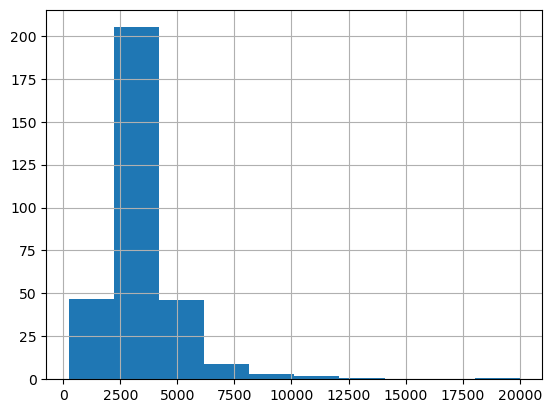

In [95]:
rent[rent['Miasto'] == 'Gdańsk']['Cena'].hist()
plt.show()

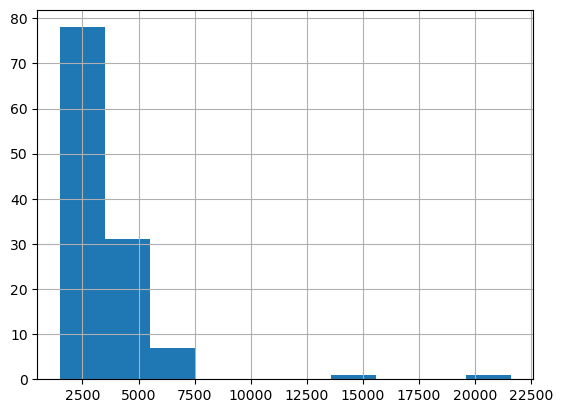

In [96]:
rent[rent['Miasto'] == 'Gdynia']['Cena'].hist()
plt.show()

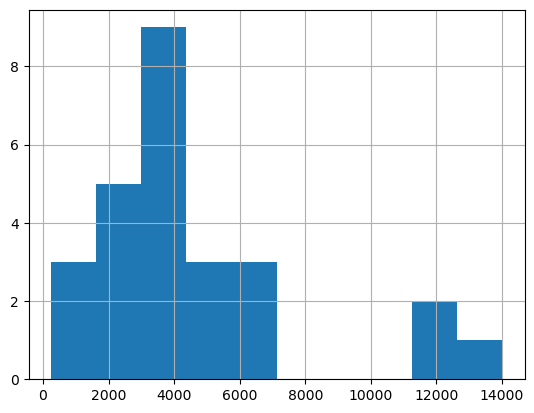

In [97]:
rent[rent['Miasto'] == 'Sopot']['Cena'].hist()
plt.show()

porównanie obu:
* ROI - stopa zwrotu